#Fire up Graphlab create

In [2]:
import turicreate

In [3]:
from turicreate import SFrame as sf


In [43]:
sales = sf("/Users/shilpabhandari/git/Predicting House Prices Using Regression/home_data.sframe")

In [44]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


#Exploring the data for housing

In [8]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [12]:
scplt = turicreate.visualization.scatter(sales["sqft_living"], sales["price"])

In [13]:
scplt

In [14]:
#Create a Simple Regression Model of sqft_living to price

In [45]:
train_data, test_data = sales.random_split(.8,seed = 0)

#Build the Regression Model

In [17]:
sqft_model = turicreate.linear_regression.create(train_data,target="price",
features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.020137     | 4353150.766341     | 3265287.319258       | 262266.144212                   | 275493.236442                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [18]:
#Evaluate the Simple Model

In [20]:
print (test_data["price"].mean())

543054.0425632538


In [21]:
sqft_model.evaluate(test_data)

{'max_error': 4146351.4003113704, 'rmse': 255179.7369135067}

In [22]:
#Let's show what our predictions look like

In [28]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

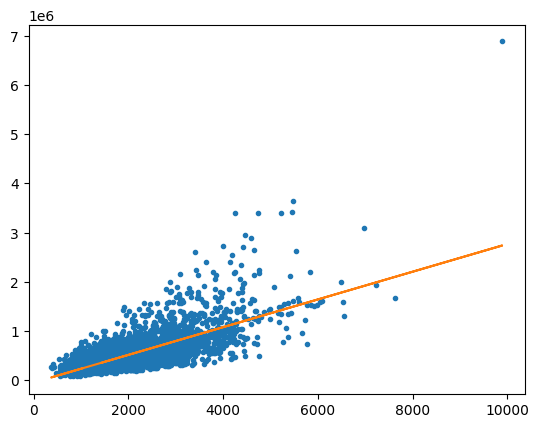

In [32]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [34]:
#Explore othe features in data

In [49]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [41]:
#Build a regression model with more features

In [50]:
my_features_model= turicreate.linear_regression.create(train_data,target='price',
features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.026646     | 3765580.753054     | 4179289.037574       | 186758.072996                   | 232237.743369                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [45]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))

{'max_error': 4146351.4003113704, 'rmse': 255179.7369135067}
{'max_error': 3128181.19292148, 'rmse': 180436.6450087544}


#Apply learned models to predict prices of 3 houses

In [48]:
house1 = sales[sales['id']=='5309101200']

In [49]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [52]:
house1['price']

dtype: float
Rows: ?
[620000.0, ... ]

In [53]:
print(sqft_model.predict(house1))

[629656.5865233524]


In [54]:
print(my_features_model.predict(house1))

[726814.3055533911]


In [55]:
house2 =sales[sales['id']=='1925069082']

In [56]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [57]:
house2['price']

dtype: float
Rows: ?
[2200000.0, ... ]

In [58]:
print(sqft_model.predict(house2))

[1260383.169899884]


In [59]:
print(my_features_model.predict(house2))

[1232877.0327826955]


In [19]:
highest_avg_price_zipcode = '98039'


In [20]:
sales_zipcode = sales[sales['zipcode'] == highest_avg_price_zipcode]


In [25]:
sales_zipcode['price'].mean()

2160606.5999999996

In [29]:
sqft_greater_than_2000= sales[(sales['sqft_living'] >2000)]


In [32]:
sqft_less_than_4000=   sales[sales['sqft_living'] < 4000] 

In [59]:
sqft_filter =sqft_greater_than_2000 or sqft_less_than_4000

In [60]:
sqft_filter.num_rows()

9901

In [61]:
sqft_filter.num_rows()/sales.num_rows()

0.4581039189376764

In [58]:
sales.num_rows()

21613

In [41]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [46]:
sqft_model = turicreate.linear_regression.create(train_data,target="price",
features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.037457     | 4334139.437881     | 1234546.661446       | 162866.573954                   | 153805.720978                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [51]:
print(my_features_model.evaluate(test_data))

{'max_error': 3177309.200512396, 'rmse': 180178.9387462173}


In [53]:
print(sqft_model.evaluate(test_data))

{'max_error': 3203246.989632671, 'rmse': 155485.87536263585}
